In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.0 MB/s eta 0:00:00


<ipython-input-7-d41bb9e9c546>:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


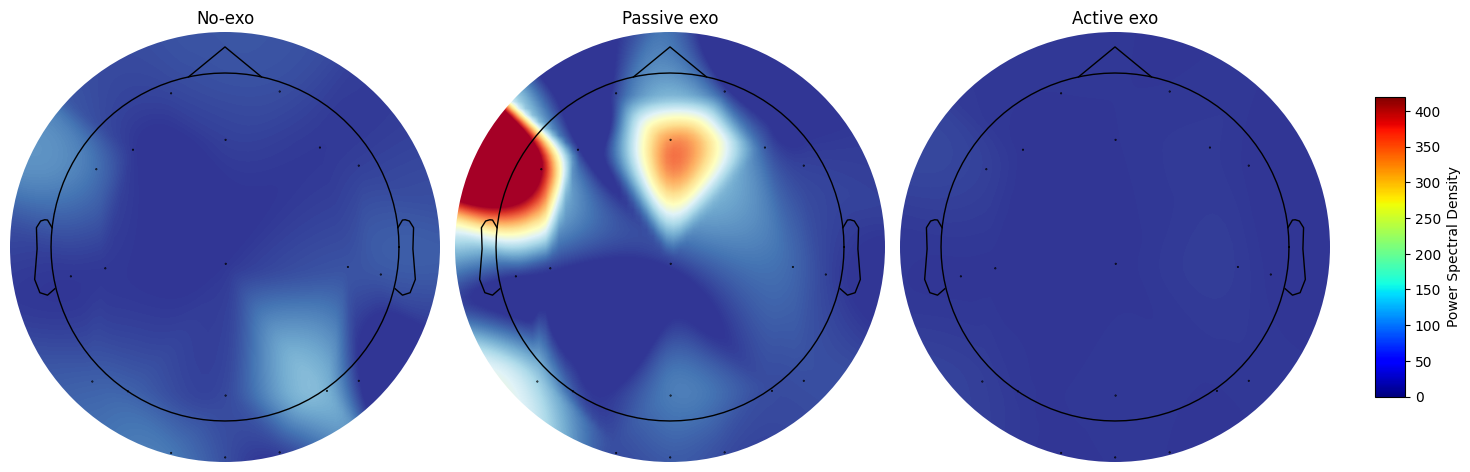

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

# Data for 32 channels across three conditions
data_conditions = {
    "No-exo": [
        1.434493099, 7.504673135, 11.4187164, 38.06118002, 2.462554093, 2.299189381,
        3.025469841, 12.60404682, 3.483439228, 2.21380509, 9.294982678, 77.1427021,
        29.20803573, 27.73585306, 20.95480452, 43.55534419, 13.64491787, 17.50856229,
        11.2152636, 42.35382035, 8.481944824, 90.695609628, 260.09819418, 250.566852305,
        22.23831486, 17.65717644, 6.895585334, 19.83718425, 5.147327155, 3.162216414,
        7.657434225, 15.86022087
    ],
    "Passive exo": [
        7.410100409, 312.57780947, 16.67797208, 410.8992705, 3.841416019, 3.765967951,
        7.197494838, 5.595835987, 47.40087877, 3.694518922, 8.097655458, 260.73823598,
        19.22758131, 111.8251255, 35.73558753, 16.51996011, 48.31656725, 26.47861394,
        16.77692423, 179.9689956, 17.29825113, 15.61840904, 38.64658652, 11.23353263,
        12.71415361, 14.60489702, 19.09275126, 34.35549759, 13.28123972, 30.76248639,
        9.104709598, 19.27724429
    ],
    "Active exo": [
        0.331903121, 1.472494136, 1.593458162, 7.227765826, 0.597964489, 0.351898589,
        0.841041764, 0.81138766, 0.857160614, 0.97085314, 0.861078561, 8.394044874,
        2.544933445, 6.553539668, 4.67265314, 0.700747425, 3.012404874, 2.011846684,
        1.589074416, 5.657327405, 2.503561533, 1.571083108, 3.894327499, 1.446152063,
        1.141405971, 1.401924566, 2.609981436, 4.844115177, 2.075422118, 3.750484548,
        1.262963598, 1.90761274
    ]
}

# Channel names
channel_names = [
    "Cz", "Fz", "Fp1", "F7", "F3", "FC1", "C3", "FC5", "FT9", "T7", "CP5", "CP1",
    "P3", "P7", "PO9", "O1", "Pz", "Oz", "O2", "PO10", "P8", "P4", "CP2", "CP6",
    "T8", "FT10", "FC6", "C4", "FC2", "F4", "F8", "Fp2"
]

# Use the standard 1020 montage
montage = make_standard_montage("standard_1020")
positions = montage.get_positions()["ch_pos"]

# Normalize channel names to match the montage
normalized_channel_names = [name.capitalize() for name in channel_names]

# Filter positions to only include valid channels
valid_channels = [ch for ch in normalized_channel_names if ch in positions]
xy_positions = np.array([list(positions[ch][:2]) for ch in valid_channels])

# Filter data to match valid channels
filtered_data_conditions = {
    condition: [val for ch, val in zip(normalized_channel_names, values) if ch in valid_channels]
    for condition, values in data_conditions.items()
}

# Plot the topographies
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = list(filtered_data_conditions.keys())
data = [filtered_data_conditions[condition] for condition in titles]

for ax, d, title in zip(axes, data, titles):
    plot_topomap(np.array(d), xy_positions, axes=ax, show=False, contours=0, cmap="RdYlBu_r", vlim=(0, 420))
    ax.set_title(title)

# Add a colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
norm = plt.Normalize(0, 420)
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, orientation="vertical", label="Power Spectral Density")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


<ipython-input-5-c9b829397925>:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


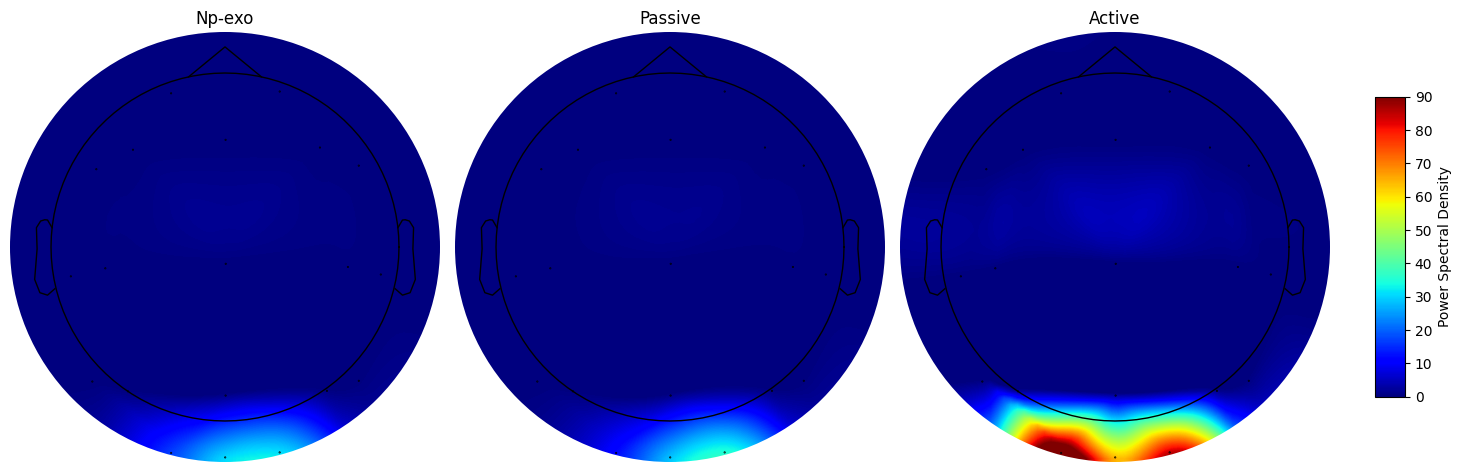

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

# Updated data for 32 channels across three conditions
data_conditions = {
    "Np-exo": [
        0, 0, 0, 0, 0, 0, 0, 60, 50, 0, 0, 0, 0, 0, 0, 16.3834856, 0, 29.16431045, 29.92069321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ],
    "Passive": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.58566133, 0, 27.47402962, 33.97695102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ],
    "Active": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 98.84046169, 0, 61.47678399, 81.15809824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]
}

# Channel names
channel_names = [
    "Cz", "Fz", "Fp1", "F7", "F3", "FC1", "C3", "FC5", "FT9", "T7", "CP5", "CP1",
    "P3", "P7", "PO9", "O1", "Pz", "Oz", "O2", "PO10", "P8", "P4", "CP2", "CP6",
    "T8", "FT10", "FC6", "C4", "FC2", "F4", "F8", "Fp2"
]





# Use the standard 1020 montage
montage = make_standard_montage("standard_1020")
positions = montage.get_positions()["ch_pos"]

# Normalize channel names to match the montage
normalized_channel_names = [name.capitalize() for name in channel_names]

# Filter positions to only include valid channels
valid_channels = [ch for ch in normalized_channel_names if ch in positions]
xy_positions = np.array([list(positions[ch][:2]) for ch in valid_channels])

# Filter data to match valid channels
filtered_data_conditions = {
    condition: [val for ch, val in zip(normalized_channel_names, values) if ch in valid_channels]
    for condition, values in data_conditions.items()
}

# Set heatmap range
vmin, vmax = 0, 90

# Plot the topographies
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = list(filtered_data_conditions.keys())
data = [filtered_data_conditions[condition] for condition in titles]

for ax, d, title in zip(axes, data, titles):
    plot_topomap(
        np.array(d),
        xy_positions,
        axes=ax,
        show=False,
        contours=0,
        cmap="jet",  # Consistent colormap
        vlim=(vmin, vmax),
    )
    ax.set_title(title)

# Add a colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
norm = plt.Normalize(vmin, vmax)
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm)  # Match the colormap here
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, orientation="vertical", label="Power Spectral Density")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
